In [1]:
import random
from typing import List
import pandas as pd
from faker import Faker
import pandera as pa
import numpy as np

In [2]:
lst_of_courses:List[str] = [
        'Computer Programming', 'Object Oriented Programming', 'Applied Physics', 
        'Data Structures', 'Database Management Systems', 'Computing Fundamentals'
]

In [3]:
# Instantiate a Faker object
fake: Faker = Faker()

# Define a Pandera schema for the DataFrame
schema = pa.DataFrameSchema({
    "roll_no": pa.Column(int, checks=pa.Check.in_range(min_value=1, max_value=100)),
    "name": pa.Column(str),
    "father_name": pa.Column(str),
    "date_of_admission": pa.Column(pa.DateTime),
    "fee": pa.Column(int, checks=pa.Check.in_range(min_value=1000, max_value=5500)),
    "course": pa.Column(str, checks=pa.Check.isin(lst_of_courses), nullable=True)
}, strict=True)

# Generate fake data for the DataFrame
data_fake = {
    "roll_no": list(range(1, 101)),  # list of integers
    "name": [fake.name() for _ in range(100)],  # list of strings (names)
    "father_name": [fake.name() for _ in range(100)],  # list of strings (names)
    "date_of_admission": [fake.date_this_decade() for _ in range(100)],  # list of datetime.date objects
    "fee": [fake.random_int(min=1000, max=5500, step=500) for _ in range(100)],  # list of integers
    "course": [random.choice(lst_of_courses) for _ in range(100)]  # list of strings (course names)
}

# Creating the DataFrame
students_df_fake: pd.DataFrame = pd.DataFrame(data_fake)

# convert the date_of_admission to date format
students_df_fake['date_of_admission'] = pd.to_datetime(students_df_fake['date_of_admission'])

# Validate the DataFrame against the schema
df: pd.DataFrame = schema.validate(students_df_fake)

In [4]:
def print_info(df):
    print('========Info========')
    display(df.info())
    print('========columns========')
    display(df.columns)
    print('========head========')
    display(df.head())

In [5]:
# map each course name to its corresponding course code
course_code_dict = {
    'Computer Programming': 'CP', 
    'Object Oriented Programming': 'OOP', 
    'Applied Physics': 'AP', 
    'Data Structures': 'DS',
    'Database Management Systems': 'DBMS', 
    'Computing Fundamentals': 'CF'
}
df['course_code'] = df['course'].map(course_code_dict)

In [6]:
print_info(df)

========Info========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            100 non-null    int64         
 1   name               100 non-null    object        
 2   father_name        100 non-null    object        
 3   date_of_admission  100 non-null    datetime64[ns]
 4   fee                100 non-null    int64         
 5   course             100 non-null    object        
 6   course_code        100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.6+ KB


None

========columns========


Index(['roll_no', 'name', 'father_name', 'date_of_admission', 'fee', 'course',
       'course_code'],
      dtype='object')

========head========


,roll_no,name,father_name,date_of_admission,fee,course,course_code
0,1,Courtney Bonilla,Mrs. Holly Collins,2023-10-04,5000,Computing Fundamentals,CF
1,2,Michelle Hines,James Jones,2022-09-24,3500,Object Oriented Programming,OOP
2,3,Lauren Lopez,Michael Butler,2022-12-27,3000,Computing Fundamentals,CF
3,4,Tamara Sweeney,Mary Castillo,2020-12-17,5000,Computing Fundamentals,CF
4,5,Anna Mora,Jon Diaz,2020-10-08,4000,Database Management Systems,DBMS


In [7]:
df['course_code'].value_counts(ascending=False, normalize=True) * 100

course_code
AP      22.0
CP      19.0
OOP     17.0
DS      16.0
CF      13.0
DBMS    13.0
Name: proportion, dtype: float64

In [8]:
bins = [0, 1500, 3000, 4500, 6000]
labels = ['0-1500', '1501-3000', '3001-4500', '4501-6000']

# Add a new column 'fee_slab' to categorize the fees
df['fee_slab'] = pd.cut(df['fee'], bins=bins, labels=labels, right=False)

In [9]:
df['fee_slab'].value_counts(ascending=False)

fee_slab
4501-6000    33
1501-3000    28
3001-4500    28
0-1500       11
Name: count, dtype: int64

In [10]:
# Generate fake data for the fee transactions
num_transactions = 100  # You can adjust this number as needed

data_transactions = {
    "transaction_date": [fake.date_this_decade() for _ in range(num_transactions)],
    "fee": [fake.random_int(min=1000, max=5500, step=500) for _ in range(num_transactions)]
}

# Convert transaction_date to datetime64[ns]
data_transactions["transaction_date"] = pd.to_datetime(data_transactions["transaction_date"])

# Creating the DataFrame
transactions_df = pd.DataFrame(data_transactions)

# Define a Pandera schema for the DataFrame
schema = pa.DataFrameSchema({
    "transaction_date": pa.Column(pa.DateTime),
    "fee": pa.Column(int, checks=pa.Check.in_range(min_value=1000, max_value=5500))
})

# Validate the DataFrame against the schema
transactions_df = schema.validate(transactions_df)

In [11]:
print_info(transactions_df)

========Info========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  100 non-null    datetime64[ns]
 1   fee               100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


None

========columns========


Index(['transaction_date', 'fee'], dtype='object')

========head========


,transaction_date,fee
0,2022-01-08,5500
1,2024-02-11,4000
2,2021-08-26,5000
3,2022-02-19,5000
4,2023-11-07,5000


In [12]:
bins = [0, 1500, 3000, 4500, 6000]
labels = ['0-1500', '1501-3000', '3001-4500', '4501-6000']
# Add a new column 'fee_slab' to categorize the fees
transactions_df['fees_slab'] = pd.cut(df['fee'], bins=bins, labels=labels)

In [13]:
print_info(transactions_df)

========Info========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  100 non-null    datetime64[ns]
 1   fee               100 non-null    int64         
 2   fees_slab         100 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 2.0 KB


None

========columns========


Index(['transaction_date', 'fee', 'fees_slab'], dtype='object')

========head========


,transaction_date,fee,fees_slab
0,2022-01-08,5500,4501-6000
1,2024-02-11,4000,3001-4500
2,2021-08-26,5000,1501-3000
3,2022-02-19,5000,4501-6000
4,2023-11-07,5000,3001-4500


In [14]:
transactions_df['fees_slab'].value_counts(normalize=True) * 100

fees_slab
3001-4500    31.0
1501-3000    26.0
0-1500       22.0
4501-6000    21.0
Name: proportion, dtype: float64

In [15]:
pd.qcut(df['fee'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

0     Q4
1     Q2
2     Q2
3     Q4
4     Q3
      ..
95    Q3
96    Q1
97    Q2
98    Q1
99    Q1
Name: fee, Length: 100, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [16]:
pd.qcut(df['fee'], q=[0.0 , 0.3, 0.5, 0.7, 0.9]).value_counts(normalize=True).round(2) * 100

fee
(999.999, 2500.0]    43.0
(3500.0, 4500.0]     25.0
(2500.0, 3500.0]     19.0
(4500.0, 5000.0]     13.0
Name: proportion, dtype: float64

In [17]:
print_info(df)

========Info========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            100 non-null    int64         
 1   name               100 non-null    object        
 2   father_name        100 non-null    object        
 3   date_of_admission  100 non-null    datetime64[ns]
 4   fee                100 non-null    int64         
 5   course             100 non-null    object        
 6   course_code        100 non-null    object        
 7   fee_slab           100 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 5.9+ KB


None

========columns========


Index(['roll_no', 'name', 'father_name', 'date_of_admission', 'fee', 'course',
       'course_code', 'fee_slab'],
      dtype='object')

========head========


,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
0,1,Courtney Bonilla,Mrs. Holly Collins,2023-10-04,5000,Computing Fundamentals,CF,4501-6000
1,2,Michelle Hines,James Jones,2022-09-24,3500,Object Oriented Programming,OOP,3001-4500
2,3,Lauren Lopez,Michael Butler,2022-12-27,3000,Computing Fundamentals,CF,3001-4500
3,4,Tamara Sweeney,Mary Castillo,2020-12-17,5000,Computing Fundamentals,CF,4501-6000
4,5,Anna Mora,Jon Diaz,2020-10-08,4000,Database Management Systems,DBMS,3001-4500


In [18]:
df['course_code'].value_counts()

course_code
AP      22
CP      19
OOP     17
DS      16
CF      13
DBMS    13
Name: count, dtype: int64

In [19]:
df[df['course_code'] == 'CF'].head()

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
0,1,Courtney Bonilla,Mrs. Holly Collins,2023-10-04,5000,Computing Fundamentals,CF,4501-6000
2,3,Lauren Lopez,Michael Butler,2022-12-27,3000,Computing Fundamentals,CF,3001-4500
3,4,Tamara Sweeney,Mary Castillo,2020-12-17,5000,Computing Fundamentals,CF,4501-6000
10,11,Jesse Reid,Steven Carrillo,2023-06-21,4000,Computing Fundamentals,CF,3001-4500
37,38,Marc Morris,Neil Moore,2020-07-06,4500,Computing Fundamentals,CF,4501-6000


In [20]:
df[(df['course_code'].str.lower() == 'cf') & (df['fee'] > 5000)]

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
60,61,Anthony Hicks,Angela Davies,2021-12-06,5500,Computing Fundamentals,CF,4501-6000
81,82,Desiree Martinez,Dennis Warren,2020-08-02,5500,Computing Fundamentals,CF,4501-6000
88,89,Cynthia Garcia,Greg Whitehead,2020-04-15,5500,Computing Fundamentals,CF,4501-6000


In [21]:
df[df['course'].str.lower().str.contains('comput')]['course'].unique()

array(['Computing Fundamentals', 'Computer Programming'], dtype=object)

In [22]:
df[(df['course'].str.lower().str.contains('comput')) & (df['fee'] >= 5000)]

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
0,1,Courtney Bonilla,Mrs. Holly Collins,2023-10-04,5000,Computing Fundamentals,CF,4501-6000
3,4,Tamara Sweeney,Mary Castillo,2020-12-17,5000,Computing Fundamentals,CF,4501-6000
51,52,Kari Keller,Amanda Clark,2023-04-05,5500,Computer Programming,CP,4501-6000
60,61,Anthony Hicks,Angela Davies,2021-12-06,5500,Computing Fundamentals,CF,4501-6000
74,75,Courtney Parsons,Joel Fuller,2023-08-18,5000,Computer Programming,CP,4501-6000
77,78,Jerry Curtis,Darlene Flores,2022-09-08,5000,Computer Programming,CP,4501-6000
81,82,Desiree Martinez,Dennis Warren,2020-08-02,5500,Computing Fundamentals,CF,4501-6000
84,85,Brandon Smith,Nicole Brown,2023-06-18,5000,Computing Fundamentals,CF,4501-6000
88,89,Cynthia Garcia,Greg Whitehead,2020-04-15,5500,Computing Fundamentals,CF,4501-6000


In [23]:
df[(df['course'].str.lower().str.contains('comput')) | (df['course'].str.lower().str.contains('data')) ]['course'].unique()

array(['Computing Fundamentals', 'Database Management Systems',
       'Computer Programming', 'Data Structures'], dtype=object)

In [24]:
df[df['date_of_admission'].dt.year == 2024]

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
18,19,Sydney Nelson,Bryan Jackson,2024-02-28,2500,Computer Programming,CP,1501-3000
38,39,Amber Leblanc,Jimmy Sanders,2024-06-02,2500,Applied Physics,AP,1501-3000
40,41,Danny Johnson,Tricia Dean,2024-04-18,5000,Database Management Systems,DBMS,4501-6000
45,46,Emily Butler,Daniel Fry,2024-01-25,4000,Computer Programming,CP,3001-4500
53,54,Mario Patton,Cynthia Clarke,2024-06-06,2500,Database Management Systems,DBMS,1501-3000
59,60,Sharon Wilson,Nicholas Silva,2024-07-20,2000,Computing Fundamentals,CF,1501-3000
63,64,Scott Schaefer,Amy Dennis,2024-03-31,1000,Computer Programming,CP,0-1500
66,67,Abigail Gould,Michelle Schultz,2024-01-04,2000,Computer Programming,CP,1501-3000
75,76,Jesse Costa,Brittany Simon,2024-06-16,1000,Database Management Systems,DBMS,0-1500
78,79,Carlos Harris,Keith Franklin,2024-06-10,4500,Applied Physics,AP,4501-6000


In [25]:
max_year = df['date_of_admission'].dt.year.max()
df[df['date_of_admission'].dt.year == max_year].sort_values(by='fee', ascending=False)

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
40,41,Danny Johnson,Tricia Dean,2024-04-18,5000,Database Management Systems,DBMS,4501-6000
78,79,Carlos Harris,Keith Franklin,2024-06-10,4500,Applied Physics,AP,4501-6000
45,46,Emily Butler,Daniel Fry,2024-01-25,4000,Computer Programming,CP,3001-4500
86,87,Mark Hensley,Veronica Martin,2024-06-23,4000,Applied Physics,AP,3001-4500
18,19,Sydney Nelson,Bryan Jackson,2024-02-28,2500,Computer Programming,CP,1501-3000
38,39,Amber Leblanc,Jimmy Sanders,2024-06-02,2500,Applied Physics,AP,1501-3000
53,54,Mario Patton,Cynthia Clarke,2024-06-06,2500,Database Management Systems,DBMS,1501-3000
59,60,Sharon Wilson,Nicholas Silva,2024-07-20,2000,Computing Fundamentals,CF,1501-3000
66,67,Abigail Gould,Michelle Schultz,2024-01-04,2000,Computer Programming,CP,1501-3000
63,64,Scott Schaefer,Amy Dennis,2024-03-31,1000,Computer Programming,CP,0-1500


In [26]:
import datetime

datetime = datetime.datetime.now()

datetime

datetime.datetime(2024, 8, 4, 0, 11, 57, 226071)

In [27]:
s1:pd.Series = pd.Series(datetime)
s1

0   2024-08-04 00:11:57.226071
dtype: datetime64[ns]

# strftime Format Codes in Pandas

| Format Code | Meaning                                                 | Example           |
|-------------|---------------------------------------------------------|-------------------|
| `%a`        | Abbreviated weekday name                                | Sun, Mon, ...     |
| `%A`        | Full weekday name                                       | Sunday, Monday, ...|
| `%w`        | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday | 0, 1, ..., 6     |
| `%d`        | Day of the month as a zero-padded decimal number        | 01, 02, ..., 31   |
| `%b`        | Abbreviated month name                                  | Jan, Feb, ...     |
| `%B`        | Full month name                                         | January, February, ... |
| `%m`        | Month as a zero-padded decimal number                   | 01, 02, ..., 12   |
| `%y`        | Year without century as a zero-padded decimal number    | 00, 01, ..., 99   |
| `%Y`        | Year with century                                       | 1900, 2023, ...   |
| `%H`        | Hour (24-hour clock) as a zero-padded decimal number    | 00, 01, ..., 23   |
| `%I`        | Hour (12-hour clock) as a zero-padded decimal number    | 01, 02, ..., 12   |
| `%p`        | AM or PM                                                | AM, PM            |
| `%M`        | Minute as a zero-padded decimal number                  | 00, 01, ..., 59   |
| `%S`        | Second as a zero-padded decimal number                  | 00, 01, ..., 59   |
| `%f`        | Microsecond as a decimal number, zero-padded on the left | 000000, 000001, ..., 999999 |
| `%z`        | UTC offset in the form +HHMM or -HHMM                   | +0000, -0400, +0930 |
| `%Z`        | Time zone name                                          | UTC, EST, CST     |
| `%j`        | Day of the year as a zero-padded decimal number         | 001, 002, ..., 366 |
| `%U`        | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number | 00, 01, ..., 53   |
| `%W`        | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number | 00, 01, ..., 53   |
| `%c`        | Locale’s appropriate date and time representation       | Tue Aug 03 14:14:00 2024 |
| `%x`        | Locale’s appropriate date representation                | 08/03/24          |
| `%X`        | Locale’s appropriate time representation                | 14:14:00          |
| `%%`        | A literal '%' character                                 | %                 |


In [28]:
s1.dt.strftime('%Y-%m-%d %H:%M:%S')

0    2024-08-04 00:11:57
dtype: object

In [29]:
s1.dt.strftime('%Y-%m-%d %I %b')

0    2024-08-04 12 Aug
dtype: object

In [30]:
s2:pd.Series = pd.Series([
    '12 November 2024',
    '24 October 2023',
    '10 March 2022',
])
s2

0    12 November 2024
1     24 October 2023
2       10 March 2022
dtype: object

In [31]:
s2.apply(lambda x: datetime.strptime(x, '%d %B %Y')) # string to datetime

0   2024-11-12
1   2023-10-24
2   2022-03-10
dtype: datetime64[ns]

In [32]:
df.head()

,roll_no,name,father_name,date_of_admission,fee,course,course_code,fee_slab
0,1,Courtney Bonilla,Mrs. Holly Collins,2023-10-04,5000,Computing Fundamentals,CF,4501-6000
1,2,Michelle Hines,James Jones,2022-09-24,3500,Object Oriented Programming,OOP,3001-4500
2,3,Lauren Lopez,Michael Butler,2022-12-27,3000,Computing Fundamentals,CF,3001-4500
3,4,Tamara Sweeney,Mary Castillo,2020-12-17,5000,Computing Fundamentals,CF,4501-6000
4,5,Anna Mora,Jon Diaz,2020-10-08,4000,Database Management Systems,DBMS,3001-4500


In [33]:
df.groupby(['course'])['fee'].sum()

course
Applied Physics                87000
Computer Programming           49000
Computing Fundamentals         54000
Data Structures                45500
Database Management Systems    35000
Object Oriented Programming    58500
Name: fee, dtype: int64

In [34]:
(
    df[df['date_of_admission'].dt.year.isin([2023, 2024])]
        .groupby([df['date_of_admission'].dt.year, df['date_of_admission'].dt.month_name(), 'course'])['fee']
        .sum()
)

date_of_admission  date_of_admission  course                     
2023               April              Computer Programming            5500
                                      Object Oriented Programming     1000
                   August             Applied Physics                 4000
                                      Computer Programming            5000
                   February           Data Structures                 2000
                   January            Object Oriented Programming     2500
                   July               Object Oriented Programming     7000
                   June               Computing Fundamentals          9000
                   March              Applied Physics                 3500
                                      Computing Fundamentals          4000
                   May                Applied Physics                 8500
                   November           Data Structures                 5500
                                  

In [35]:
df.groupby(['course'])['course'].agg('count')

course
Applied Physics                22
Computer Programming           19
Computing Fundamentals         13
Data Structures                16
Database Management Systems    13
Object Oriented Programming    17
Name: course, dtype: int64

In [36]:
df.groupby(['course'])['fee'].agg(['count', 'min', 'max', 'std'])

,count,min,max,std
course,,,,
Applied Physics,22,1500,5500,1153.762901
Computer Programming,19,1000,5500,1464.991068
Computing Fundamentals,13,2000,5500,1281.025230
Data Structures,16,1000,5500,1630.120139
Database Management Systems,13,1000,5000,1267.189501
Object Oriented Programming,17,1000,5500,1401.810804


In [37]:
df.groupby(['course'])['fee'].agg(no_of_students='count', min_fees='min', max_fees='max', std_fees='std').reset_index()

,course,no_of_students,min_fees,max_fees,std_fees
0,Applied Physics,22,1500,5500,1153.762901
1,Computer Programming,19,1000,5500,1464.991068
2,Computing Fundamentals,13,2000,5500,1281.025230
3,Data Structures,16,1000,5500,1630.120139
4,Database Management Systems,13,1000,5000,1267.189501
5,Object Oriented Programming,17,1000,5500,1401.810804


<Axes: xlabel='course_code'>

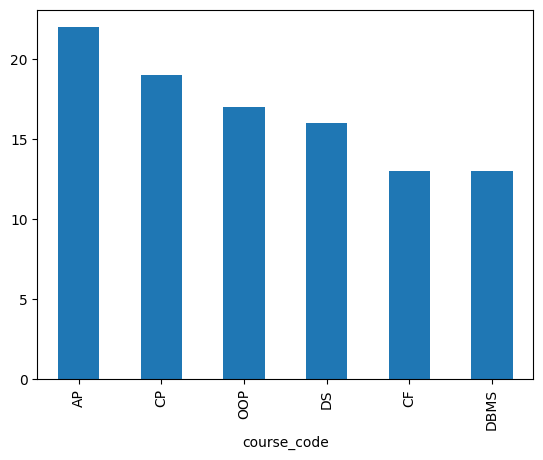

In [38]:
df['course_code'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

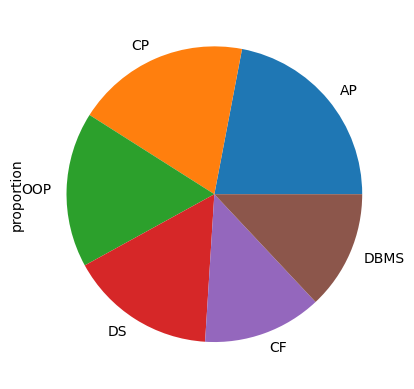

In [39]:
df['course_code'].value_counts(normalize=True).plot(kind='pie')

<Axes: xlabel='course_code'>

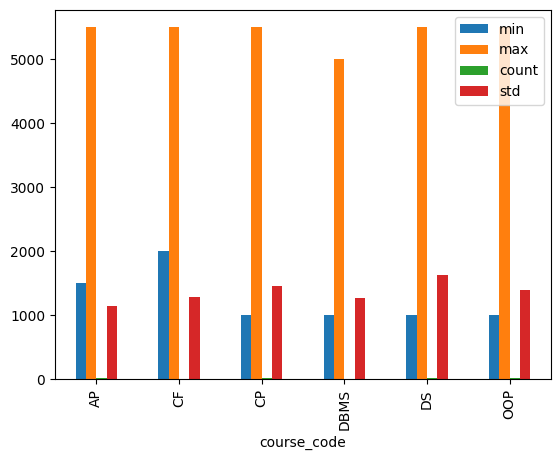

In [40]:
df.groupby(['course_code'])['fee'].agg(['min', 'max', 'count', 'std']).plot(kind='bar')

In [59]:
fake = Faker()

# Generate students data
students_data = {
    'student_id': [i for i in range(1, 101)],
    'student_name': [fake.name() for _ in range(100)],
    'course_id': [random.randint(101, 110) for _ in range(100)]
}
students_df = pd.DataFrame(students_data)

# Generate teachers data
teachers_data = {
    'teacher_id': [i for i in range(1, 101, 5)],
    'teacher_name': [fake.name() for _ in range(1, 101, 5)],
    'course_id': [random.randint(101, 110) for _ in range(20)]
}
teachers_df = pd.DataFrame(teachers_data)

# Generate courses data
courses_data = {
    'course_id': [i for i in range(101, 107)],
    'course_name': [random.choice(lst_of_courses) for _ in range(6)]
}
courses_df = pd.DataFrame(courses_data)

# Generate fees data
fees_data = {
    'course_id': [i for i in range(101, 107)],
    'fee': [random.randint(300, 1000) for _ in range(6)]
}
fees_df = pd.DataFrame(fees_data)

# Display the DataFrames
print("Students DataFrame:")
display(students_df.head())
print("\nTeachers DataFrame:")
display(teachers_df.head())
print("\nCourses DataFrame:")
display(courses_df)
print("\nFees DataFrame:")
display(fees_df)

Students DataFrame:


,student_id,student_name,course_id
0,1,Theodore Terry,102
1,2,Stacey Morton,102
2,3,Gregory Luna,106
3,4,Martin Herman,105
4,5,Tara Rhodes,103



Teachers DataFrame:


,teacher_id,teacher_name,course_id
0,1,Frank Foster,101
1,6,Richard Jenkins,105
2,11,Christopher Mccormick,109
3,16,Scott Gillespie,106
4,21,Audrey Walker,106



Courses DataFrame:


,course_id,course_name
0,101,Applied Physics
1,102,Computer Programming
2,103,Applied Physics
3,104,Object Oriented Programming
4,105,Data Structures
5,106,Object Oriented Programming



Fees DataFrame:


,course_id,fee
0,101,813
1,102,424
2,103,763
3,104,645
4,105,861
5,106,608


In [60]:
teachers_df.merge(courses_df, on='course_id')

,teacher_id,teacher_name,course_id,course_name
0,1,Frank Foster,101,Applied Physics
1,6,Richard Jenkins,105,Data Structures
2,16,Scott Gillespie,106,Object Oriented Programming
3,21,Audrey Walker,106,Object Oriented Programming
4,26,Brett Taylor,103,Applied Physics
5,41,Heather Barnes,102,Computer Programming
6,46,Thomas Camacho,105,Data Structures
7,51,Ashley Snyder,103,Applied Physics
8,66,Michael Thomas,103,Applied Physics
9,71,Cassandra Ballard,104,Object Oriented Programming


In [61]:
courses_df.merge(fees_df, on='course_id', how='inner')

,course_id,course_name,fee
0,101,Applied Physics,813
1,102,Computer Programming,424
2,103,Applied Physics,763
3,104,Object Oriented Programming,645
4,105,Data Structures,861
5,106,Object Oriented Programming,608


In [62]:
courses_df.merge(fees_df, on='course_id', how='left')

,course_id,course_name,fee
0,101,Applied Physics,813
1,102,Computer Programming,424
2,103,Applied Physics,763
3,104,Object Oriented Programming,645
4,105,Data Structures,861
5,106,Object Oriented Programming,608


In [58]:
courses_df .merge(teachers_df, on='course_id', how='left')

,course_id,course_name,teacher_id,teacher_name
0,101,Data Structures,1,Kristin Williams
1,101,Data Structures,56,Lisa Henderson
2,101,Data Structures,66,Abigail Gardner
3,102,Computing Fundamentals,36,Rebecca Mullins
4,102,Computing Fundamentals,61,Danielle Moran
5,102,Computing Fundamentals,76,Ann Rodriguez
6,103,Database Management Systems,41,Joseph Parker
7,103,Database Management Systems,71,Shelly Vazquez
8,104,Computer Programming,26,Jennifer Valentine
9,105,Computer Programming,46,John Jones


In [63]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'age': [24, 28, 22, 32]
})

# Inner Join: Only include rows with keys present in both DataFrames
inner_join = pd.merge(df1, df2, on='id', how='inner')
print("Inner Join:\n", inner_join)

# Left Join: Include all rows from the left DataFrame, and corresponding rows from the right DataFrame
left_join = pd.merge(df1, df2, on='id', how='left')
print("\nLeft Join:\n", left_join)

# Right Join: Include all rows from the right DataFrame, and corresponding rows from the left DataFrame
right_join = pd.merge(df1, df2, on='id', how='right')
print("\nRight Join:\n", right_join)

# Outer Join: Include all rows from both DataFrames, with NaNs where there are no matches
outer_join = pd.merge(df1, df2, on='id', how='outer')
print("\nOuter Join:\n", outer_join)

Inner Join:
    id     name  age
0   3  Charlie   24
1   4    David   28

Left Join:
    id     name   age
0   1    Alice   NaN
1   2      Bob   NaN
2   3  Charlie  24.0
3   4    David  28.0

Right Join:
    id     name  age
0   3  Charlie   24
1   4    David   28
2   5      NaN   22
3   6      NaN   32

Outer Join:
    id     name   age
0   1    Alice   NaN
1   2      Bob   NaN
2   3  Charlie  24.0
3   4    David  28.0
4   5      NaN  22.0
5   6      NaN  32.0


In [64]:
# Sample DataFrames
df1 = pd.DataFrame({
    'employee_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'emp_id': [3, 4, 5, 6],
    'age': [24, 28, 22, 32]
})

# Inner Join with different column names
inner_join = pd.merge(df1, df2, left_on='employee_id', right_on='emp_id', how='inner')
print("Inner Join:\n", inner_join)

Inner Join:
    employee_id     name  emp_id  age
0            3  Charlie       3   24
1            4    David       4   28


In [68]:
student_fees = students_df.merge(courses_df, on='course_id').merge(fees_df, on='course_id')

In [72]:
student_fees_agg = student_fees.groupby('student_id')['fee'].agg('sum')

In [77]:
students_df.merge(student_fees_agg, left_on='student_id', right_index=True)

,student_id,student_name,course_id,fee
0,1,Theodore Terry,102,424
1,2,Stacey Morton,102,424
2,3,Gregory Luna,106,608
3,4,Martin Herman,105,861
4,5,Tara Rhodes,103,763
...,...,...,...,...
89,90,Becky Johnson,105,861
93,94,Joshua Ramos,104,645
97,98,Stephen Skinner,104,645
98,99,Dr. Robyn Salazar,105,861


In [78]:
# Sample DataFrames
df1 = pd.DataFrame({
    'employee_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'age': [24, 28, 22, 32]
}, index=[3, 4, 5, 6])  # Setting index to correspond with employee_id in df1

# Right Join using the index of df2
right_join = pd.merge(df1, df2, left_on='employee_id', right_index=True, how='right')
print("Right Join:\n", right_join)

Right Join:
      employee_id     name  age
2.0            3  Charlie   24
3.0            4    David   28
NaN            5      NaN   22
NaN            6      NaN   32
